In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from fd_functions_heat_equation import *

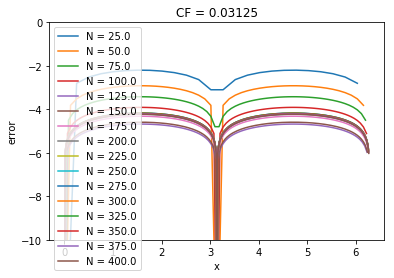

In [34]:
def u_ana(x,t):
    return np.exp(-t)*np.sin(x)
start = 0.
end = 2*np.pi
CF_range = [2**(-i) for i in range(5)]
Nx_range = np.linspace(25,525,16)
max_error_log10 = []
for Nx in Nx_range:
    x = np.linspace(start, end, int(Nx), endpoint = False)
    dx = (end-start)/Nx
    CF = 2**(-5)
    dt = dx*CF
    a = 1
    u = u_ana(x,0)
    q = d_dx_periodic(u,a,dx)
    t = 0 
    t_target = 1.
    nt = int((t_target-t)/dt)
    for n in range(nt):
        u = RK4_step(u,a,dx, dt, d_dt,q)
        q = d_dx_periodic(u,a,dx)
        t += dt
    plt.plot(x, np.log10(np.abs(u- u_ana(x,t))),label = "N = "+ str(Nx))
    plt.xlabel('x')
    plt.ylabel('error')
    plt.title('CF = ' + str(CF))
    plt.ylim(-10,0)
    plt.legend()
    max_error_log10.append(np.max(np.log10(np.abs(u- u_ana(x,t)))))

No handles with labels found to put in legend.


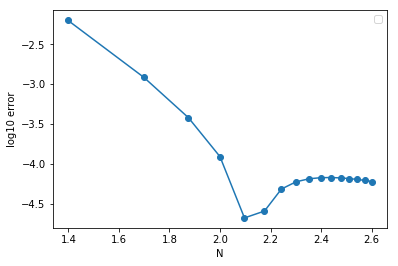

In [37]:
plt.plot(np.log10(Nx_range), max_error_log10, marker = 'o')
plt.xlabel('N')
plt.ylabel('log10 error')
plt.legend()

In [36]:
np.linspace(25,525,21)

array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250., 275.,
       300., 325., 350., 375., 400., 425., 450., 475., 500., 525.])

In [31]:
np.linspace(25,400,16)

array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250., 275.,
       300., 325., 350., 375., 400.])